In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# import the data
appearances = pd.read_csv('ewf_appearances.csv')
matches = pd.read_csv('ewf_matches.csv')
standings = pd.read_csv('ewf_standings.csv')

In [50]:
# filter appearances for 2024-2025 season of women's championship
appearances_2024 = appearances[appearances['season'] == '2024-2025']
appearances_2024 = appearances_2024[appearances_2024['division'] == "Women's Championship"]
appearances_2024

,season_id,season,tier,division,match_id,match_name,date,attendance,team_id,team_name,...,away_team,goals_for,goals_against,goal_difference,result,win,loss,draw,note,points
4860,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-001-M,Birmingham City Women vs Sunderland Women,2024-09-08,1284,T-003-T,Birmingham City Women,...,0,5,0,5,Win,1,0,0,NaN,3
4861,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-001-M,Birmingham City Women vs Sunderland Women,2024-09-08,1284,T-027-T,Sunderland Women,...,1,0,5,-5,Loss,0,1,0,NaN,0
4862,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-002-M,Charlton Athletic Women vs Portsmouth Women,2024-09-08,632,T-007-T,Charlton Athletic Women,...,0,3,0,3,Win,1,0,0,NaN,3
4863,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-002-M,Charlton Athletic Women vs Portsmouth Women,2024-09-08,632,T-033-T,Portsmouth Women,...,1,0,3,-3,Loss,0,1,0,NaN,0
4864,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-003-M,Durham Women vs Sheffield United Women,2024-09-08,877,T-012-T,Durham Women,...,0,2,1,1,Win,1,0,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-108-M,Durham Women vs Bristol City Women,2025-05-04,1031,T-006-T,Bristol City Women,...,1,0,2,-2,Loss,0,1,0,NaN,0
5076,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-109-M,Southampton Women vs Charlton Athletic Women,2025-05-04,2188,T-026-T,Southampton Women,...,0,0,2,-2,Loss,0,1,0,NaN,0
5077,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-109-M,Southampton Women vs Charlton Athletic Women,2025-05-04,2188,T-007-T,Charlton Athletic Women,...,1,2,0,2,Win,1,0,0,NaN,3
5078,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-110-M,Sunderland Women vs Sheffield United Women,2025-05-04,541,T-027-T,Sunderland Women,...,0,2,1,1,Win,1,0,0,NaN,3


In [51]:
# Collate the monthly points for each team

# Add a month column to the appearances_2024 dataframe
appearances_2024['month'] = pd.to_datetime(appearances_2024['date']).dt.to_period('M')

# view the updated dataframe
appearances_2024


,season_id,season,tier,division,match_id,match_name,date,attendance,team_id,team_name,...,goals_for,goals_against,goal_difference,result,win,loss,draw,note,points,month
4860,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-001-M,Birmingham City Women vs Sunderland Women,2024-09-08,1284,T-003-T,Birmingham City Women,...,5,0,5,Win,1,0,0,NaN,3,2024-09
4861,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-001-M,Birmingham City Women vs Sunderland Women,2024-09-08,1284,T-027-T,Sunderland Women,...,0,5,-5,Loss,0,1,0,NaN,0,2024-09
4862,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-002-M,Charlton Athletic Women vs Portsmouth Women,2024-09-08,632,T-007-T,Charlton Athletic Women,...,3,0,3,Win,1,0,0,NaN,3,2024-09
4863,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-002-M,Charlton Athletic Women vs Portsmouth Women,2024-09-08,632,T-033-T,Portsmouth Women,...,0,3,-3,Loss,0,1,0,NaN,0,2024-09
4864,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-003-M,Durham Women vs Sheffield United Women,2024-09-08,877,T-012-T,Durham Women,...,2,1,1,Win,1,0,0,NaN,3,2024-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-108-M,Durham Women vs Bristol City Women,2025-05-04,1031,T-006-T,Bristol City Women,...,0,2,-2,Loss,0,1,0,NaN,0,2025-05
5076,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-109-M,Southampton Women vs Charlton Athletic Women,2025-05-04,2188,T-026-T,Southampton Women,...,0,2,-2,Loss,0,1,0,NaN,0,2025-05
5077,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-109-M,Southampton Women vs Charlton Athletic Women,2025-05-04,2188,T-007-T,Charlton Athletic Women,...,2,0,2,Win,1,0,0,NaN,3,2025-05
5078,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-110-M,Sunderland Women vs Sheffield United Women,2025-05-04,541,T-027-T,Sunderland Women,...,2,1,1,Win,1,0,0,NaN,3,2025-05


In [52]:
# Collate the number of games played each month for each team. If a team did not appear in a month, it should be recorded as 0 games played.
appearances_2024['games_played'] = 1
monthly_games = appearances_2024.groupby(['team_name', 'month']).agg({'games_played': 'count'}).reset_index()
all_team_names = appearances_2024['team_name'].unique()
all_months = appearances_2024['month'].unique()
all_combinations = pd.MultiIndex.from_product([all_team_names, all_months], names=['team_name', 'month'])
monthly_games = monthly_games.set_index(['team_name', 'month']).reindex(all_combinations, fill_value=0).reset_index()
monthly_games

,team_name,month,games_played
0,Birmingham City Women,2024-09,4
1,Birmingham City Women,2024-10,3
2,Birmingham City Women,2024-11,2
3,Birmingham City Women,2024-12,1
4,Birmingham City Women,2025-01,2
5,Birmingham City Women,2025-02,2
6,Birmingham City Women,2025-03,3
7,Birmingham City Women,2025-04,2
8,Birmingham City Women,2025-05,1
9,Sunderland Women,2024-09,3


In [53]:
# total games played by team
total_games = appearances_2024.groupby('team_name').agg({'games_played': 'count'}).reset_index()
total_games = total_games.rename(columns={'games_played': 'total_games'})
total_games

,team_name,total_games
0,Birmingham City Women,20
1,Blackburn Rovers Women,20
2,Bristol City Women,20
3,Charlton Athletic Women,20
4,Durham Women,20
5,London City Lionesses,20
6,Newcastle United Women,20
7,Portsmouth Women,20
8,Sheffield United Women,20
9,Southampton Women,20


In [54]:
# pivot the monthly_games dataframe to have months as columns
monthly_games_pivot = monthly_games.pivot(index='team_name', columns='month', values='games_played').reset_index()
monthly_games_pivot.columns.name = None
monthly_games_pivot = monthly_games_pivot.fillna(0)
monthly_games_pivot

,team_name,2024-09,2024-10,2024-11,2024-12,2025-01,2025-02,2025-03,2025-04,2025-05
0,Birmingham City Women,4,3,2,1,2,2,3,2,1
1,Blackburn Rovers Women,3,3,3,0,1,1,5,3,1
2,Bristol City Women,3,3,3,1,2,1,4,2,1
3,Charlton Athletic Women,4,3,2,1,2,1,5,1,1
4,Durham Women,4,2,3,1,2,2,3,2,1
5,London City Lionesses,4,2,3,1,1,2,4,2,1
6,Newcastle United Women,3,3,3,0,2,1,4,3,1
7,Portsmouth Women,4,3,2,1,2,2,4,2,0
8,Sheffield United Women,4,3,3,0,2,2,3,2,1
9,Southampton Women,4,2,3,1,2,2,3,2,1


In [55]:
# calculate the monthly away goals scored for each team

# filter matches for 2024-2025 season and Women's Championship division
matches_2024 = matches[matches['season'] == '2024-2025']
matches_2024 = matches_2024[matches_2024['division'] == 'Women\'s Championship']

# add a month column to the matches_2024 dataframe
matches_2024['month'] = pd.to_datetime(matches_2024['date']).dt.to_period('M')
matches_2024.head()

,season_id,season,tier,division,match_id,match_name,date,attendance,home_team_id,home_team_name,...,home_team_score,away_team_score,home_team_score_margin,away_team_score_margin,home_team_win,away_team_win,draw,result,note,month
2430,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-001-M,Birmingham City Women vs Sunderland Women,2024-09-08,1284,T-003-T,Birmingham City Women,...,5,0,5,-5,1,0,0,Home team win,NaN,2024-09
2431,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-002-M,Charlton Athletic Women vs Portsmouth Women,2024-09-08,632,T-007-T,Charlton Athletic Women,...,3,0,3,-3,1,0,0,Home team win,NaN,2024-09
2432,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-003-M,Durham Women vs Sheffield United Women,2024-09-08,877,T-012-T,Durham Women,...,2,1,1,-1,1,0,0,Home team win,NaN,2024-09
2433,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-004-M,London City Lionesses vs Newcastle United Women,2024-09-08,1781,T-019-T,London City Lionesses,...,1,1,0,0,0,0,1,Draw,NaN,2024-09
2434,S-2024-2025-2-S,2024-2025,2,Women's Championship,M-2024-2025-2-005-M,Southampton Women vs Bristol City Women,2024-09-08,1622,T-026-T,Southampton Women,...,1,1,0,0,0,0,1,Draw,NaN,2024-09


In [56]:
# calculate the monthly away goals scored for each team
monthly_away_goals = matches_2024.groupby(['away_team_name', 'month']).agg({'away_team_score': 'sum'}).reset_index()
monthly_away_goals.rename(columns={'away_team_name': 'team_name', 'away_team_score': 'monthly_away_goals'}, inplace=True)
monthly_away_goals

,team_name,month,monthly_away_goals
0,Birmingham City Women,2024-09,0
1,Birmingham City Women,2024-10,4
2,Birmingham City Women,2024-11,2
3,Birmingham City Women,2025-01,3
4,Birmingham City Women,2025-02,1
5,Birmingham City Women,2025-03,3
6,Birmingham City Women,2025-04,1
7,Blackburn Rovers Women,2024-09,1
8,Blackburn Rovers Women,2024-10,1
9,Blackburn Rovers Women,2024-11,1


In [57]:
# Collate the monthly points, goal difference and goals scored for each team
appearances_2024['month'] = pd.to_datetime(appearances_2024['date']).dt.to_period('M')
monthly_stats = appearances_2024.groupby(['team_name', 'month']).agg({'points': 'sum', 'goal_difference': 'sum', 'goals_for': 'sum'}).reset_index()

# Sort by month and points
monthly_stats = monthly_stats.sort_values(by=['month', 'points'], ascending=[True, False])

# reset index
monthly_stats = monthly_stats.reset_index(drop=True)
monthly_stats

,team_name,month,points,goal_difference,goals_for
0,Charlton Athletic Women,2024-09,12,7,8
1,Durham Women,2024-09,9,4,7
2,Birmingham City Women,2024-09,7,8,9
3,London City Lionesses,2024-09,7,1,5
4,Newcastle United Women,2024-09,7,4,5
5,Southampton Women,2024-09,7,4,6
6,Blackburn Rovers Women,2024-09,3,-2,2
7,Sunderland Women,2024-09,3,-7,1
8,Bristol City Women,2024-09,2,-1,2
9,Portsmouth Women,2024-09,0,-12,0


In [58]:
# Merge monthly_stats with monthly_away_goals
monthly_stats = pd.merge(monthly_stats, monthly_away_goals, on=['team_name', 'month'], how='left')
monthly_stats['monthly_away_goals'] = monthly_stats['monthly_away_goals'].fillna(0)

monthly_stats

,team_name,month,points,goal_difference,goals_for,monthly_away_goals
0,Charlton Athletic Women,2024-09,12,7,8,3.0
1,Durham Women,2024-09,9,4,7,4.0
2,Birmingham City Women,2024-09,7,8,9,0.0
3,London City Lionesses,2024-09,7,1,5,2.0
4,Newcastle United Women,2024-09,7,4,5,3.0
5,Southampton Women,2024-09,7,4,6,3.0
6,Blackburn Rovers Women,2024-09,3,-2,2,1.0
7,Sunderland Women,2024-09,3,-7,1,0.0
8,Bristol City Women,2024-09,2,-1,2,2.0
9,Portsmouth Women,2024-09,0,-12,0,0.0


In [59]:
# merge monthly_stats with monthly_games
monthly_stats = pd.merge(monthly_games, monthly_stats, on=['team_name', 'month'], how='left')
monthly_stats = monthly_stats.fillna(0)
monthly_stats


,team_name,month,games_played,points,goal_difference,goals_for,monthly_away_goals
0,Birmingham City Women,2024-09,4,7.0,8.0,9.0,0.0
1,Birmingham City Women,2024-10,3,9.0,5.0,6.0,4.0
2,Birmingham City Women,2024-11,2,3.0,-1.0,2.0,2.0
3,Birmingham City Women,2024-12,1,1.0,0.0,0.0,0.0
4,Birmingham City Women,2025-01,2,3.0,0.0,4.0,3.0
5,Birmingham City Women,2025-02,2,6.0,2.0,2.0,1.0
6,Birmingham City Women,2025-03,3,7.0,3.0,5.0,3.0
7,Birmingham City Women,2025-04,2,4.0,2.0,4.0,1.0
8,Birmingham City Women,2025-05,1,1.0,0.0,2.0,0.0
9,Sunderland Women,2024-09,3,3.0,-7.0,1.0,0.0


In [60]:
# add a cumulative points column
monthly_stats['cumulative_points'] = monthly_stats.groupby('team_name')['points'].cumsum()

# do the same for goal difference and goals for, and monthly away goals
monthly_stats['cumulative_goal_difference'] = monthly_stats.groupby('team_name')['goal_difference'].cumsum()
monthly_stats['cumulative_goals_for'] = monthly_stats.groupby('team_name')['goals_for'].cumsum()
monthly_stats['cumulative_away_goals'] = monthly_stats.groupby('team_name')['monthly_away_goals'].cumsum()
monthly_stats


,team_name,month,games_played,points,goal_difference,goals_for,monthly_away_goals,cumulative_points,cumulative_goal_difference,cumulative_goals_for,cumulative_away_goals
0,Birmingham City Women,2024-09,4,7.0,8.0,9.0,0.0,7.0,8.0,9.0,0.0
1,Birmingham City Women,2024-10,3,9.0,5.0,6.0,4.0,16.0,13.0,15.0,4.0
2,Birmingham City Women,2024-11,2,3.0,-1.0,2.0,2.0,19.0,12.0,17.0,6.0
3,Birmingham City Women,2024-12,1,1.0,0.0,0.0,0.0,20.0,12.0,17.0,6.0
4,Birmingham City Women,2025-01,2,3.0,0.0,4.0,3.0,23.0,12.0,21.0,9.0
5,Birmingham City Women,2025-02,2,6.0,2.0,2.0,1.0,29.0,14.0,23.0,10.0
6,Birmingham City Women,2025-03,3,7.0,3.0,5.0,3.0,36.0,17.0,28.0,13.0
7,Birmingham City Women,2025-04,2,4.0,2.0,4.0,1.0,40.0,19.0,32.0,14.0
8,Birmingham City Women,2025-05,1,1.0,0.0,2.0,0.0,41.0,19.0,34.0,14.0
9,Sunderland Women,2024-09,3,3.0,-7.0,1.0,0.0,3.0,-7.0,1.0,0.0


In [61]:
# Sort within each season by points, then GD, then goals_for (descending)
monthly_stats_sorted = monthly_stats.sort_values(
    by=['month','cumulative_points','cumulative_goal_difference','cumulative_goals_for', 'cumulative_away_goals'],
    ascending=[True, False, False, False, False]
)

# Assign rank per month
monthly_stats_sorted['rank'] = monthly_stats_sorted.groupby('month') \
    .cumcount() + 1

# If you want rank as an integer column:
monthly_stats_sorted['rank'] = monthly_stats_sorted['rank'].astype(int)
# reset index
monthly_stats_sorted = monthly_stats_sorted.reset_index(drop=True)
monthly_stats_sorted

,team_name,month,games_played,points,goal_difference,goals_for,monthly_away_goals,cumulative_points,cumulative_goal_difference,cumulative_goals_for,cumulative_away_goals,rank
0,Charlton Athletic Women,2024-09,4,12.0,7.0,8.0,3.0,12.0,7.0,8.0,3.0,1
1,Durham Women,2024-09,4,9.0,4.0,7.0,4.0,9.0,4.0,7.0,4.0,2
2,Birmingham City Women,2024-09,4,7.0,8.0,9.0,0.0,7.0,8.0,9.0,0.0,3
3,Southampton Women,2024-09,4,7.0,4.0,6.0,3.0,7.0,4.0,6.0,3.0,4
4,Newcastle United Women,2024-09,3,7.0,4.0,5.0,3.0,7.0,4.0,5.0,3.0,5
5,London City Lionesses,2024-09,4,7.0,1.0,5.0,2.0,7.0,1.0,5.0,2.0,6
6,Blackburn Rovers Women,2024-09,3,3.0,-2.0,2.0,1.0,3.0,-2.0,2.0,1.0,7
7,Sunderland Women,2024-09,3,3.0,-7.0,1.0,0.0,3.0,-7.0,1.0,0.0,8
8,Bristol City Women,2024-09,3,2.0,-1.0,2.0,2.0,2.0,-1.0,2.0,2.0,9
9,Sheffield United Women,2024-09,4,0.0,-6.0,1.0,1.0,0.0,-6.0,1.0,1.0,10


In [62]:
# transform data to have months as rows and teams as columns with rank as values
monthly_rank_pivot = monthly_stats_sorted.pivot(index='month', columns='team_name', values='rank').reset_index()
monthly_rank_pivot.columns.name = None
monthly_rank_pivot

# extract as csv
monthly_rank_pivot.to_csv('monthly_rankings_2024_womens_championship.csv', index=False)

In [63]:
# transform data to have months as rows and teams as columns with cumulative_points as values
monthly_points_pivot = monthly_stats_sorted.pivot(index='month', columns='team_name', values='cumulative_points').reset_index()
monthly_points_pivot.columns.name = None
monthly_points_pivot

# extract as csv
monthly_points_pivot.to_csv('monthly_points_2024_womens_championship.csv', index=False)

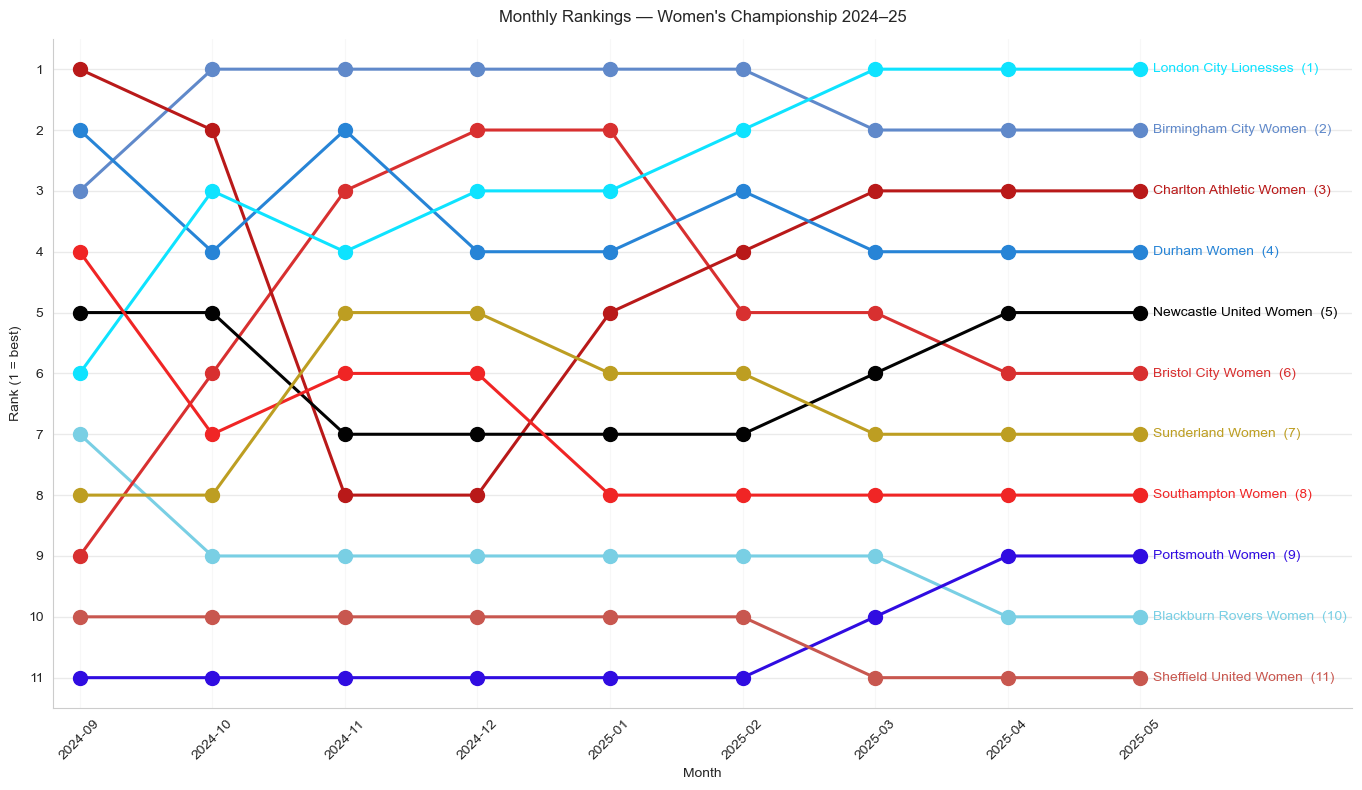

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# --- 1) Data prep ------------------------------------------------------------
df = monthly_stats_sorted.copy()

# ensure types
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df['month'] = pd.to_datetime(df['month'].astype(str))  # 'YYYY-MM' works

# order months and pivot to wide: rows = months, columns = teams, values = rank
pivot = (df.sort_values(['month','rank','team_name'])
           .pivot_table(index='month', columns='team_name', values='rank', aggfunc='first'))
pivot = pivot.sort_index()

# (optional) Limit to N teams to keep chart readable
# keep_teams = pivot.iloc[-1].sort_values().index[:10]   # best 10 by last month rank
# pivot = pivot[keep_teams]

# --- 2) Colors (your dict; fallback to default if a team is missing) ---------
team_colors = {
    'Charlton Athletic Women': "#b91919",
    'London City Lionesses':   "#0ee3ff",
    'Bristol City Women':      "#d83030",
    'Durham Women':            "#2784d6",
    'Birmingham City Women':   "#6089ca",
    'Southampton Women':       "#F02525",
    'Newcastle United Women':  "#020202",
    'Blackburn Rovers Women':  "#79cfe4",
    'Sunderland Women':        "#bd9e22",
    'Sheffield United Women':  "#c8574f",
    'Portsmouth Women':        "#300CE1",
}

# --- 3) Plot (professional bump chart) --------------------------------------
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(pivot.index))
month_labels = [d.strftime('%Y-%m') for d in pivot.index]

# light, minimal style
ax.set_facecolor('white')
for spine in ['top','right']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', color='#dddddd', linewidth=1, alpha=0.6)
ax.grid(axis='x', color='#f0f0f0', linewidth=0.8, alpha=0.5)

for team in pivot.columns:
    y = pivot[team]
    c = team_colors.get(team, None)
    ax.plot(x, y, linewidth=2.2, marker='o', markersize=10, label=team, color=c)
    # label at the right edge
    if pd.notna(y.iloc[-1]):
        ax.text(x[-1] + 0.1, y.iloc[-1], f"{team}  ({int(y.iloc[-1])})",
                va='center', fontsize=10, color=c or 'black')

# rank 1 at the top
ax.invert_yaxis()

# tidy axes
ax.set_xticks(x)
ax.set_xticklabels(month_labels, rotation=45)
ax.set_yticks(range(int(np.nanmin(pivot.values)), int(np.nanmax(pivot.values))+1))
ax.set_xlabel('Month')
ax.set_ylabel('Rank (1 = best)')
ax.set_title("Monthly Rankings — Women's Championship 2024–25", pad=12)

# give space on the right for labels/logos
ax.set_xlim(-0.2, x[-1] + 1.6)

# legend is redundant (we label at the right); remove it:
ax.legend_.remove() if ax.get_legend() else None

plt.tight_layout()
plt.show()
